In [1]:
import gym
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, message="`np.bool8` is a deprecated alias for `np.bool_`")



In [2]:
env=gym.make('CartPole-v1')

In [3]:
env.observation_space

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

In [4]:
env.action_space

Discrete(2)

In [5]:
###discretize observation space
bins=[np.linspace(-2.4,2.4,11),np.linspace(-3.4,3.4,11),np.linspace(-0.5,0.5,11),np.linspace(-2,2,11)]

In [6]:
bins

[array([-2.4 , -1.92, -1.44, -0.96, -0.48,  0.  ,  0.48,  0.96,  1.44,
         1.92,  2.4 ]),
 array([-3.4000000e+00, -2.7200000e+00, -2.0400000e+00, -1.3600000e+00,
        -6.8000000e-01, -4.4408921e-16,  6.8000000e-01,  1.3600000e+00,
         2.0400000e+00,  2.7200000e+00,  3.4000000e+00]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 array([-2. , -1.6, -1.2, -0.8, -0.4,  0. ,  0.4,  0.8,  1.2,  1.6,  2. ])]

In [7]:
def discretize(state):
    discrete_obs_space=[]
    for i in range(len(state)):
        discrete_obs_space.append(np.digitize(state[i],bins[i]))
    return tuple(discrete_obs_space)
for i in range(2):
    state=env.observation_space.sample()
    print(f'state={state}')
    print(f'discretized_state={discretize(state)}')
        

state=[-2.0981181e-01 -2.6616787e+38 -3.6168250e-01  1.3765807e+38]
discretized_state=(5, 0, 2, 11)
state=[-1.3152070e+00 -1.4237148e+38 -1.6390294e-02 -3.3022797e+38]
discretized_state=(3, 0, 5, 0)


gamma:   0%|          | 0/2 [00:00<?, ?it/s]

epsilon:   0%|          | 0/1 [00:00<?, ?it/s]

epsilon: 100%|██████████| 1/1 [02:24<00:00, 144.17s/it]

gamma:  50%|█████     | 1/2 [02:24<02:24, 144.19s/it]

epsilon:   0%|          | 0/1 [00:00<?, ?it/s]

epsilon: 100%|██████████| 1/1 [03:35<00:00, 215.23s/it]

gamma:   0%|          | 0/2 [00:00<?, ?it/s]

epsilon:   0%|          | 0/1 [00:00<?, ?it/s]

epsilon: 100%|██████████| 1/1 [05:01<00:00, 301.99s/it]

gamma:  50%|█████     | 1/2 [05:01<05:01, 301.99s/it]

epsilon:   0%|          | 0/1 [00:00<?, ?it/s]

epsilon: 100%|██████████| 1/1 [04:50<00:00, 290.87s/it]

gamma:   0%|          | 0/2 [00:00<?, ?it/s]

epsilon:   0%|          | 0/1 [00:00<?, ?it/s]

epsilon: 100%|██████████| 1/1 [04:56<00:00, 296.49s/it]

gamma:  50%|█████     | 1/2 [04:56<04:56, 296.51s/it]

epsilon:   0%|          | 0/1 [00:00<?, ?it/s]

epsilon: 100%|██████████| 1/1 [04:57<00:00, 297.15s/it]

aplha: 100%|██████████| 3/3 [25:46<00:00, 515.34s/it]


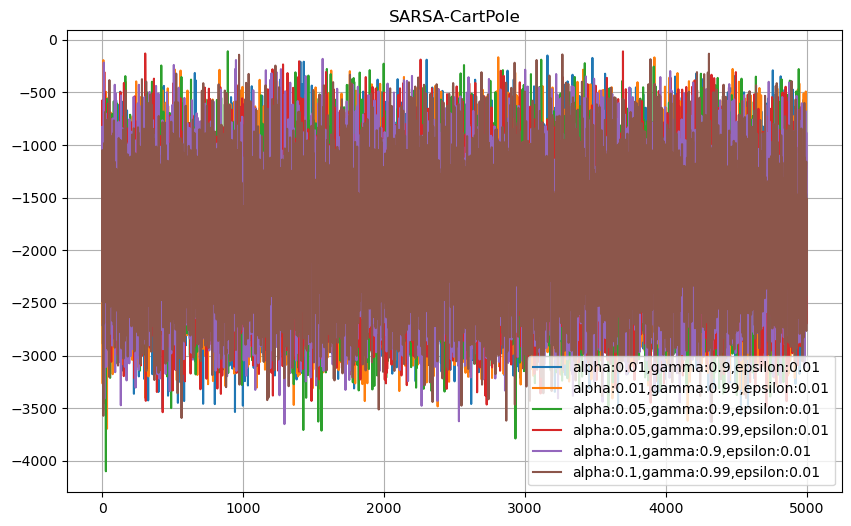

In [19]:
###implement TD learning-Q algo
q_table=defaultdict(lambda:np.zeros(env.action_space.n))
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1  # Exploration rate
epsilon_decay = 0.99
min_epsilon = 0.01
episodes=1000
rewards_per_episode=[]
x=[]
def take_action(state):
    if random.random()<epsilon:
        action=env.action_space.sample()
    else:
        action=np.argmax(q_table[state])
    return action
legend=[]
specific=[]
results=[]
for alpha in tqdm([0.01, 0.05, 0.1],desc='aplha'):
    for gamma in tqdm([0.9, 0.99],desc='gamma'):
        for epsilon in tqdm([0.1],desc='epsilon'):
            #results=[]
            q_table_ql=defaultdict(lambda:np.zeros(6))
            #q_table_mc=defaultdict(lambda:np.zeros(6))
            #alpha = 0.1  # Learning rate
            #gamma = 0.99  # Discount factor
            #epsilon = 0.1  # Exploration rate
            epsilon_decay = 0.99
            min_epsilon = 0.01
            episode_data=[]
            #episodes = 1000
            done=False
            x_episodes=[]
            reward_after_each_episode_ql=[]
            reward_after_each_episode_mc=[]
            episodes=5000
            q_table = defaultdict(lambda: np.zeros(env.action_space.n))
            rewards_per_episode = []
            x = []
            for episode in range(episodes):
                total_rewards=0
                done=False
                state=discretize(env.reset()[0])
                while not done:
                    action=take_action(state)
                    next_state,reward,done,_,_=env.step(action)
                    total_rewards+=reward
                    ##update q
                    next_state=discretize(next_state)
                    q_table[state][action]+=alpha*(reward+gamma*(max(q_table[state])-q_table[state][action]))###SARSA
                    state=next_state
                rewards_per_episode.append(total_rewards)
                epsilon = max(min_epsilon, epsilon * epsilon_decay)
                x.append(episode)
            results.append((alpha,gamma,epsilon,rewards_per_episode))
        
plt.figure(figsize=(10,6))
plt.grid(True)
for alpha,gamma,epsilon,rewards in results:
    plt.plot(x,rewards,label=f'alpha:{alpha},gamma:{gamma},epsilon:{epsilon}')
plt.title('SARSA-CartPole')
plt.legend()
plt.show()
            

                                       
        
        


In [18]:
env.reset()[0]

array([ 0.03401629, -0.03987874,  0.0441526 ,  0.00320781], dtype=float32)

In [19]:
env.step(0)

C:\Users\Shraddha\.anaconda\anaconda-navigator\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


(array([ 0.03321872, -0.23560518,  0.04421675,  0.309488  ], dtype=float32),
 1.0,
 False,
 False,
 {})

Gamma:   0%|          | 0/2 [00:00<?, ?it/s]

Epsilon:   0%|          | 0/1 [00:00<?, ?it/s]


Episodes:   0%|          | 0/5000 [00:00<?, ?it/s]C:\Users\Shraddha\AppData\Local\Temp\ipykernel_1316\3191464283.py:13: RuntimeWarning: overflow encountered in subtract
  state_adj = (state - env.observation_space.low) * np.array([bins, bins, bins, bins]) / (env.observation_space.high - env.observation_space.low)



Episodes:   1%|          | 62/5000 [00:00<00:07, 619.54it/s]


Episodes:   3%|▎         | 142/5000 [00:00<00:06, 722.76it/s]


Episodes:   4%|▍         | 222/5000 [00:00<00:06, 752.67it/s]


Episodes:   6%|▋         | 325/5000 [00:00<00:05, 859.97it/s]


Episodes:   9%|▊         | 426/5000 [00:00<00:05, 894.54it/s]


Episodes:  10%|█         | 517/5000 [00:00<00:05, 892.50it/s]


Episodes:  12%|█▏        | 607/5000 [00:00<00:05, 861.46it/s]


Episodes:  14%|█▍        | 694/5000 [00:00<00:05, 837.16it/s]


Episodes:  16%|█▌        | 788/5000 [00:00<00:04, 853.71it/s]


Episodes:  1

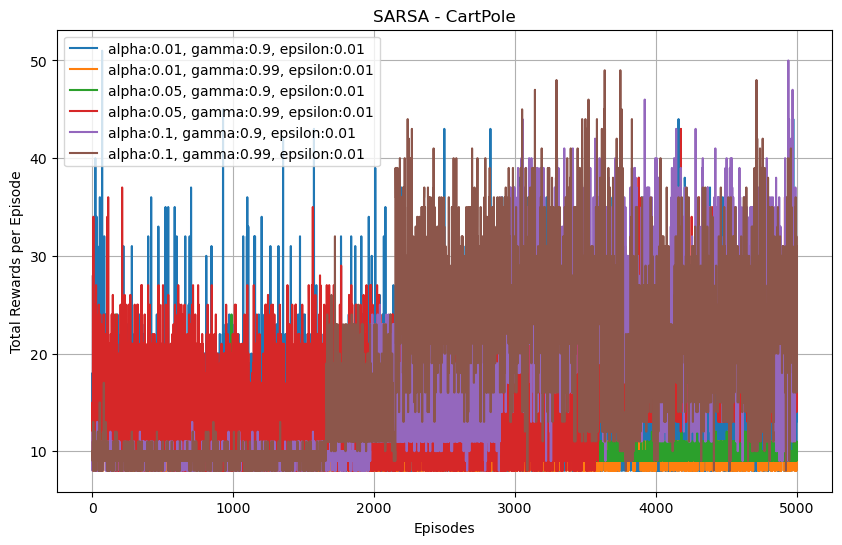

In [20]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import random
from tqdm import tqdm

# Define your environment
env = gym.make('CartPole-v1')

def discretize(state, bins=25):
    # Discretize the state space into discrete bins
    state_adj = (state - env.observation_space.low) * np.array([bins, bins, bins, bins]) / (env.observation_space.high - env.observation_space.low)
    return tuple(state_adj.astype(int))

def take_action(state, epsilon):
    if random.random() < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(q_table[state])
    return action

# Parameters
alpha_values = [0.01, 0.05, 0.1]
gamma_values = [0.9, 0.99]
epsilon_values = [0.1]
epsilon_decay = 0.99
min_epsilon = 0.01
episodes = 5000
bins = 25  # Discretize the state space into bins

results = []

for alpha in tqdm(alpha_values, desc='Alpha'):
    for gamma in tqdm(gamma_values, desc='Gamma'):
        for epsilon in tqdm(epsilon_values, desc='Epsilon'):
            q_table = defaultdict(lambda: np.zeros(env.action_space.n))
            rewards_per_episode = []
            x = []

            for episode in tqdm(range(episodes), desc='Episodes'):
                total_rewards = 0
                state = discretize(env.reset()[0], bins=bins)
                done = False

                while not done:
                    action = take_action(state, epsilon)
                    next_state, reward, done, _, _ = env.step(action)
                    total_rewards += reward
                    next_state = discretize(next_state, bins=bins)
                    next_action = take_action(next_state, epsilon)

                    # SARSA update
                    q_table[state][action] += alpha * (reward + gamma * q_table[next_state][next_action] - q_table[state][action])
                    
                    state = next_state

                rewards_per_episode.append(total_rewards)
                epsilon = max(min_epsilon, epsilon * epsilon_decay)
                x.append(episode)

            results.append((alpha, gamma, epsilon, rewards_per_episode))

# Plotting results
plt.figure(figsize=(10, 6))
plt.grid(True)

for alpha, gamma, epsilon, rewards in results:
    plt.plot(range(len(rewards)), rewards, label=f'alpha:{alpha}, gamma:{gamma}, epsilon:{epsilon}')

plt.title('SARSA - CartPole')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards per Episode')
plt.legend()
plt.show()
